In [13]:
import pandas as pd
from DecisionTree import DecisionTree
from sklearn.model_selection import train_test_split
from TreeOperations import TreeOperations
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
from Methods import Methods

In [2]:
df = pd.read_csv("encoded_final.csv")

In [5]:
# Split the dataset into training, validation, and testing sets
X = df.drop(columns = ['Credit_Score_encoded'])
y = df['Credit_Score_encoded']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

# Decision Tree (pre- SMOTE)

In [6]:
# Create an instance of the Decision Tree class
tree1 = DecisionTree(X_train, y_train, X_val, y_val, X_test, y_test)

In [7]:
Default_tree = tree1.Decision_Tree_Classic()

Decision Tree Classifier's validation accuracy is 0.747
----------------------------------------------------------------------
Decision Tree Classifier's validation classification report is:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2894
           1       0.77      0.77      0.77      5317
           2       0.70      0.69      0.70      1789

    accuracy                           0.75     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000

Decision Tree Classifier's testing accuracy is 0.7378
----------------------------------------------------------------------
Decision Tree Classifier's testing classification report is:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      2980
           1       0.76      0.77      0.77      5282
           2       0.69      0.66      0.67      1738

    accuracy            

# Decision Tree (Post- SMOTE)

In [10]:
model = DecisionTreeClassifier()
methods_instance = Methods(model) # Pass any throwaway model just to make the instance work. 
#Make sure to create a different instance with the model that you actually want to perform operations on from the Methods class

# Perform SMOTE balancing
X_train_resampled, y_train_resampled = methods_instance.SMOTE_Balancing(X_train, y_train)

Class Distribution Before SMOTE:
{0: 23124, 1: 42575, 2: 14301}

Class Distribution After SMOTE:
{0: 42575, 1: 42575, 2: 42575}


In [11]:
# Create an insatnce of the Decision Tree class
instance = DecisionTree(X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

In [12]:
tree_default = instance.Decision_Tree_Classic()

Decision Tree Classifier's validation accuracy is 0.7266
----------------------------------------------------------------------
Decision Tree Classifier's validation classification report is:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      2894
           1       0.76      0.75      0.76      5317
           2       0.66      0.67      0.67      1789

    accuracy                           0.73     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.73      0.73      0.73     10000

Decision Tree Classifier's testing accuracy is 0.7279
----------------------------------------------------------------------
Decision Tree Classifier's testing classification report is:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2980
           1       0.77      0.75      0.76      5282
           2       0.66      0.67      0.67      1738

    accuracy           

In [20]:
# prune to find best ccp_alpha
ds = DecisionTreeClassifier()
oper = TreeOperations(ds,X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test )

The ccp alpha with the lowest impurity is 0.0
Decision Tree Classifier's validation accuracy is 0.7266
----------------------------------------------------------------------
Decision Tree Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      2894
           1       0.76      0.75      0.76      5317
           2       0.66      0.67      0.67      1789

    accuracy                           0.73     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.73      0.73      0.73     10000

Decision Tree Classifier's testing accuracy is 0.7279
----------------------------------------------------------------------
Decision Tree Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.70      0.73      0.72      2980
           1       0.77      0.75      0.76      5282
           2       0.66     

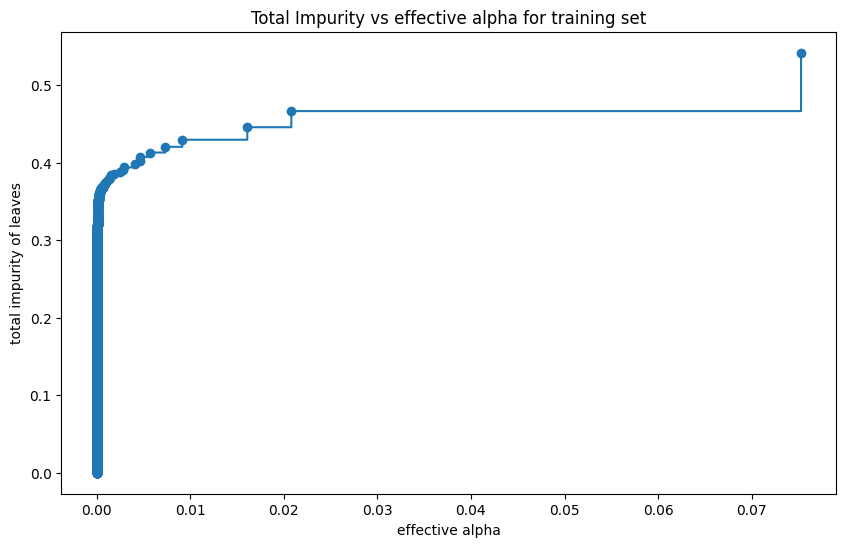

In [21]:
ds_pruned, lowest_impurity_alpha, min_impurity_idx = oper.cost_complexity_prune()

In [22]:
param_dist = {
    'ccp_alpha': [0],
    'criterion': ['gini', 'entropy'],
    'max_depth': [15, 20, 50, -1],
    'max_features': ['auto', 'sqrt', 'log2', None]          
}

In [23]:
# Finding best parameters using RandomSearchCV
best_dt_random, best_params_random = instance.Decision_Tree_RandomizedSearchCV(param_dist, cv = 5)

c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Orange\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py

Decision Tree Classifier's validation accuracy (RandomizedSearchCV) is 0.7095
----------------------------------------------------------------------
Decision Tree Classifier's validation classification report (RandomizedSearchCV) is:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2894
           1       0.76      0.73      0.74      5317
           2       0.62      0.65      0.63      1789

    accuracy                           0.71     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.71      0.71      0.71     10000

Decision Tree Classifier's testing accuracy (RandomizedSearchCV) is 0.7216
----------------------------------------------------------------------
Decision Tree Classifier's testing classification report (RandomizedSearchCV) is:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2980
           1       0.76      0.75      0.75     